# Análise da Distribuição Média de Votos por Bloco Ideológico (Brasil 2022)
Este notebook carrega o dataset consolidado `uf_votos_ideologia_socioeco_2022.csv`,
calcula a **média do percentual de votos** de cada bloco ideológico **entre os 27 estados**, 
e apresenta representações gráficas:

1. **Tabela** com as médias.
2. **Gráfico de barras** comparando as médias de cada ideologia.
3. **Gráfico de barras empilhadas** mostrando a composição percentual de blocos ideológicos por estado.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

csv_path = Path('data_lake/processed/uf_votos_ideologia_socioeco_2022.csv')  

## 1. Carregar o CSV

In [3]:
df = pd.read_csv(csv_path)
df.head()

,UF,PIB_milhoes,PIB_per_capita,IDHM_2021,Esperanca_vida_anos,Mort_infantil_pmil,Gini,Analfabetismo_perc,centro,centro-direita,centro-esquerda,direita,esquerda,total_votos,centro_perc,centro-direita_perc,centro-esquerda_perc,direita_perc,esquerda_perc
0,AC,23676,28525,"0,71",75.3,15.5,0.52,12.13,20122,3269,12314,275905,129307,440917,4.563671,0.741409,2.792816,62.575269,29.326835
1,AL,76066,24322,"0,684",73.3,13.8,0.50,17.66,67411,13133,43542,624674,975457,1724217,3.909659,0.761679,2.525320,36.229431,56.573912
2,AM,145140,36827,"0,7",73.0,16.0,0.51,6.94,87060,22214,44527,881838,1021037,2056676,4.233044,1.080092,2.164998,42.876856,49.645010
3,AP,23614,32194,"0,688",75.0,18.1,0.53,6.47,27497,4191,14670,188042,197761,432161,6.362675,0.969777,3.394568,43.512024,45.760955
4,BA,402647,28483,"0,691",74.5,14.0,0.51,12.60,197305,76651,217224,2053250,5878578,8423008,2.342453,0.910019,2.578936,24.376683,69.791908


## 2. Detectar colunas de percentual de votos por ideologia

In [4]:
ideology_perc_cols = [c for c in df.columns if c.endswith('_perc') and any(k in c for k in ['esquerda','direita','centro'])]
print('Colunas de voto percentual detectadas:', ideology_perc_cols)

Colunas de voto percentual detectadas: ['centro_perc', 'centro-direita_perc', 'centro-esquerda_perc', 'direita_perc', 'esquerda_perc']


## 3. Calcular a média de votos por ideologia (entre UFs)

In [10]:
mean_votes = df[ideology_perc_cols].mean().sort_values(ascending=False)

mean_df = (
    mean_votes
      .reset_index()                          # vira DataFrame com colunas ['index', 0]
      .rename(columns={'index': 'ideologia',   # coluna 0 → valor da média
                       0: 'media_perc'})
)

# remove o sufixo “_perc”, se ainda existir
mean_df['ideologia'] = mean_df['ideologia'].str.replace('_perc', '', regex=False)

mean_df


,ideologia,media_perc
0,esquerda,48.175004
1,direita,44.368747
2,centro,3.786141
3,centro-esquerda,2.836379
4,centro-direita,0.833729


## 4. Gráfico de barras – média nacional por ideologia

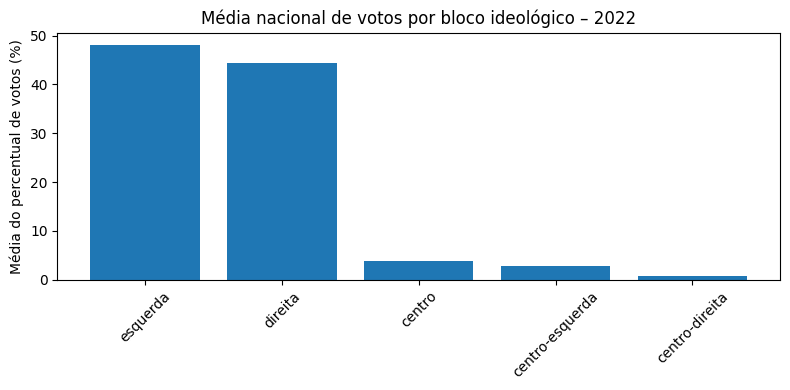

In [11]:
plt.figure(figsize=(8,4))
plt.bar(mean_df['ideologia'], mean_df['media_perc'])
plt.ylabel('Média do percentual de votos (%)')
plt.title('Média nacional de votos por bloco ideológico – 2022')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 5. Gráfico de barras empilhadas – composição por UF

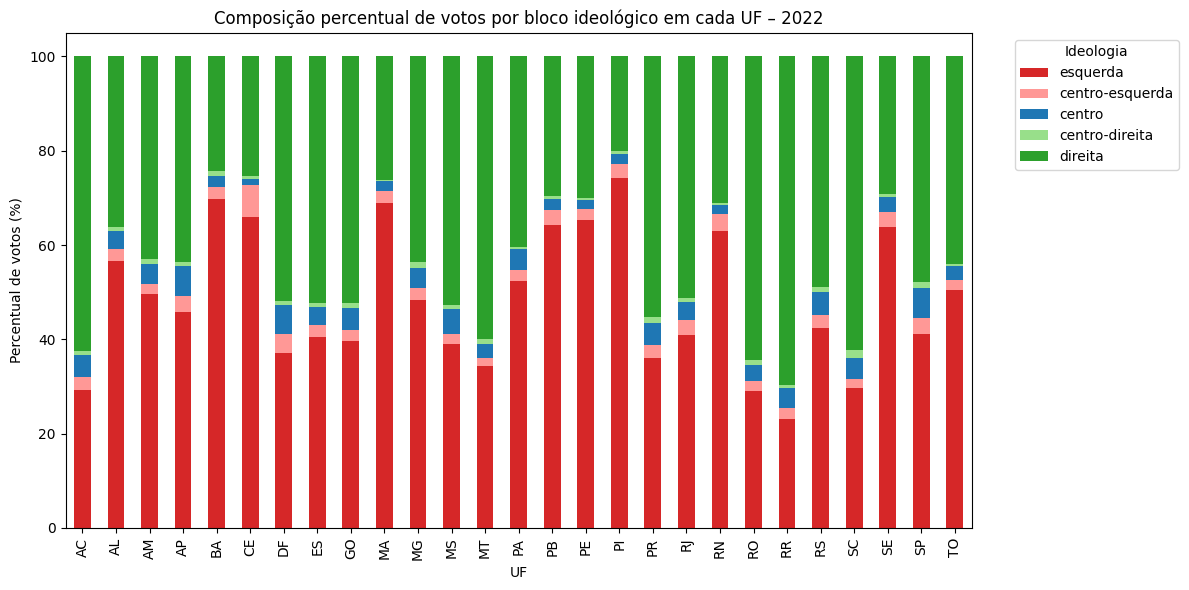

In [13]:
# 1) DataFrame empilhado por UF
df_plot = df.set_index('UF')[ideology_perc_cols]
df_plot.columns = df_plot.columns.str.replace('_perc', '', regex=False)

# 2) Paleta fixa por ideologia
color_map = {
    'esquerda':        '#d62728',   # vermelho
    'centro-esquerda': '#ff9896',   # vermelho claro / rosado
    'centro':          '#1f77b4',   # azul
    'centro-direita':  '#98df8a',   # verde claro
    'direita':         '#2ca02c',   # verde
}

# 3) Ordem de colunas e lista de cores
ordered_cols = [c for c in ['esquerda', 'centro-esquerda', 'centro',
                            'centro-direita', 'direita'] if c in df_plot.columns]
df_plot = df_plot[ordered_cols]          # garante ordem fixa
colors = [color_map[col] for col in ordered_cols]

# 4) Gráfico empilhado
df_plot.sort_index(inplace=True)
df_plot.plot(kind='bar',
             stacked=True,
             figsize=(12, 6),
             color=colors)

plt.ylabel('Percentual de votos (%)')
plt.title('Composição percentual de votos por bloco ideológico em cada UF – 2022')
plt.legend(title='Ideologia',
           bbox_to_anchor=(1.04, 1), loc='upper left')
plt.tight_layout()
plt.show()